# Office prices prediction (polynomial regression)

## Overview 

- [Problem Description](https://www.hackerrank.com/challenges/predicting-office-space-price/problem)

## Setup

- Installing scikit-learn package

```
conda install scikit-learn

```

In [1]:
import pandas as pd
import math
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
% matplotlib inline

## Data Loading

- [Dataset Source](https://www.hackerrank.com/challenges/predicting-office-space-price/problem)

In [2]:
officesDF=pd.read_csv('dataset.csv',sep=' ')
officesDF.head()

f1    f2   price
0  0.44  0.68  511.14
1  0.99  0.23  717.10
2  0.84  0.29  607.91
3  0.28  0.45  270.40
4  0.07  0.83  289.88

## Data exploration

Text(0,0.5,'F2')

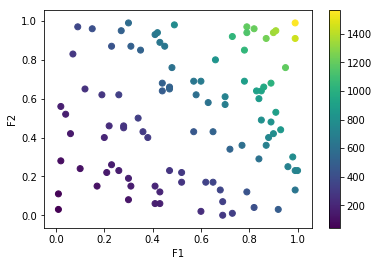

In [3]:
plt.scatter(officesDF.f1, officesDF.f2 , c=officesDF.price)
plt.colorbar()
plt.xlabel("F1")
plt.ylabel("F2")

## Model training

first you need to convert polynomial features then apply linear regression before training 

In [4]:
model = Pipeline([('poly', PolynomialFeatures(degree=len(officesDF.columns)-1)),
              ('linear', LinearRegression(fit_intercept=False))])

then splitting data into training and testing (80%, 20%)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(officesDF.drop(columns=['price']), officesDF.price, test_size=0.1, random_state=1)

and finally train model with new features

In [6]:
reg = LinearRegression()
model = reg.fit(X_train, y_train)

## Model Evaluating

There are two primary metrics used to evaluate linear models.

These are: Mean absolute error (MAE), and Root mean squared error (RMSE).

- MAE: The easiest to understand. Represents average error

- RMSE: Most popular metric, similar to MSE, however, the result is square rooted to make it more interpretable as it’s in base units. It is recommended that RMSE be used as the primary metric to interpret your model.

Below, you can see how to calculate each metric. All of them require two lists as parameters, with one being your predicted values and the other being the true values

In [7]:
p=model.predict(X_test)
print('MAE = ',metrics.mean_absolute_error(p,y_test))
print('RMSE = ',math.sqrt(metrics.mean_squared_error(p,y_test)))

MAE =  40.148359519
RMSE =  47.04234720323232
